<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  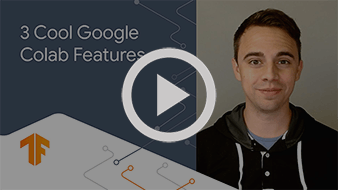
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

# New Section

In [ ]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

In [1]:
#Ans 5:
'''Yes there are outliers
one of the outlier which can afftect my analysis is of
price of the tickets for the city Banglore
it contains the very high value which i have to take care at the time of model trianing.

'''

'Yes there are outliers \none of the outlier which can afftect my analysis is of \nprice of the tickets for the city Banglore \nit contains the very high value which i have to take care at the time of model trianing.\n\n'

# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


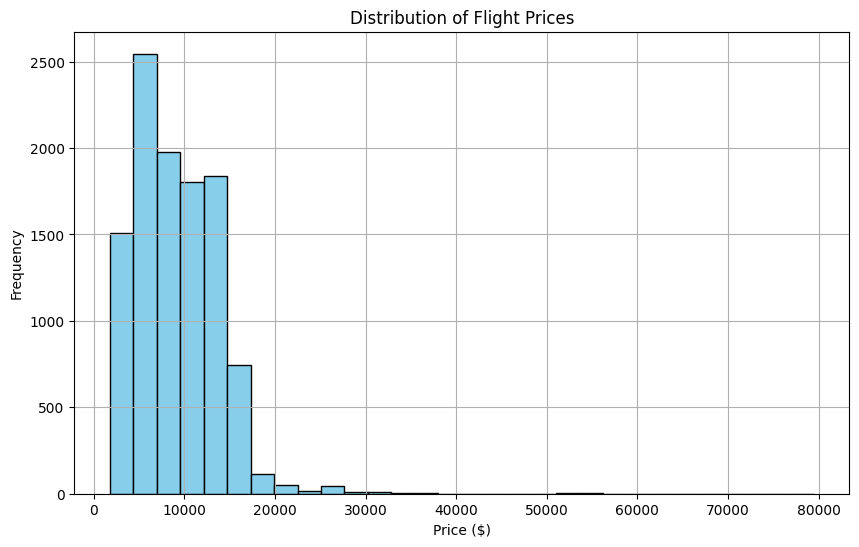

In [ ]:
#ANS 2:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
#Ans 3:
# Calculate minimum and maximum prices
min_price = df['Price'].min()
max_price = df['Price'].max()

# Calculate range
price_range = max_price - min_price

print("Minimum price:", min_price)
print("Maximum price:", max_price)
print("Price range:", price_range)

Minimum price: 1759
Maximum price: 79512
Price range: 77753


<ipython-input-17-323499b4027a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='Set3')


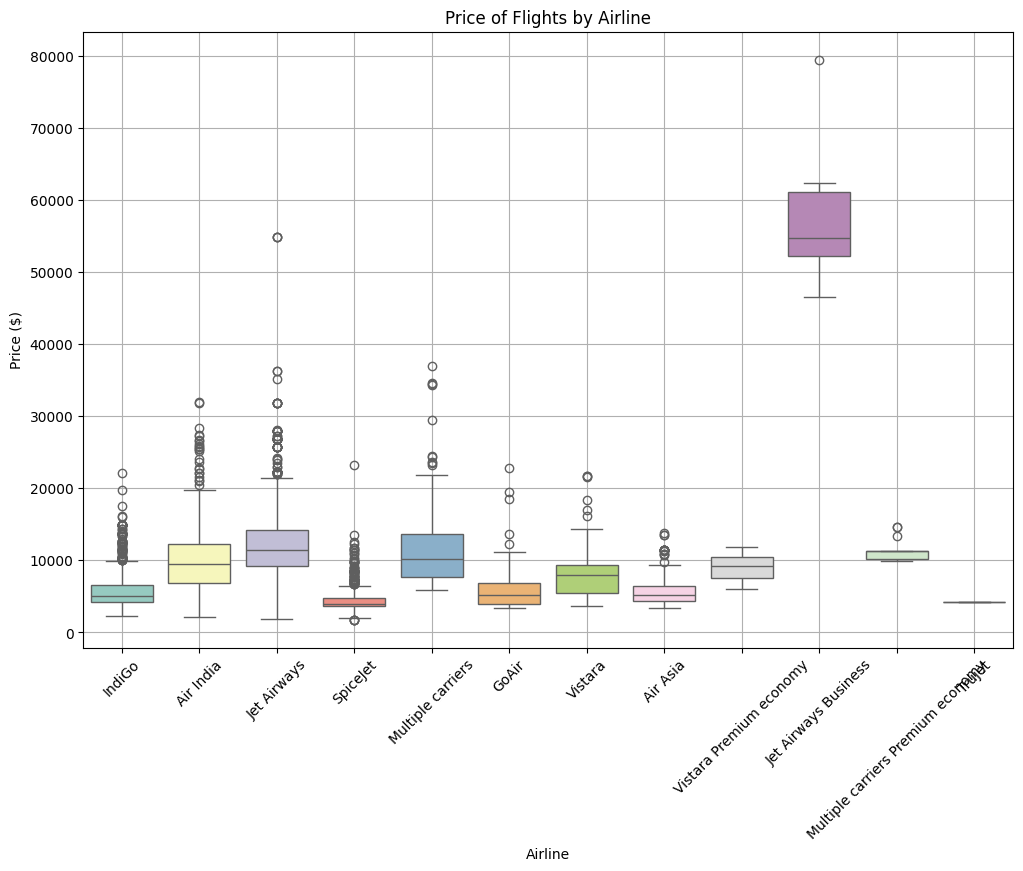

In [ ]:
#Ans 4:

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df, palette='Set3')
plt.title('Price of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,04
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,04
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,04
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,03


<ipython-input-15-79c2a2053687>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='muted')


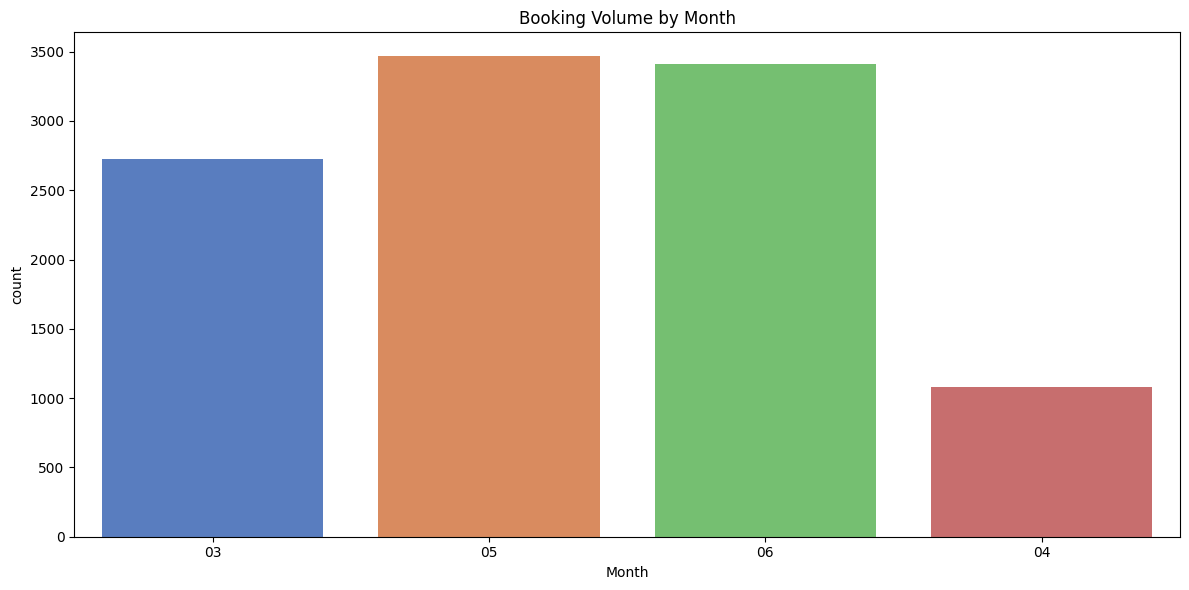


Peak travel season identified:  03


In [15]:
#Ans 6:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature analysis
plt.figure(figsize=(12, 6))

# Booking volume over time
sns.countplot(x='Month', data=df, palette='muted')
plt.title('Booking Volume by Month')

plt.tight_layout()
plt.show()

# Identify peak travel season
peak_season = df.groupby('Month')['Price'].mean().idxmax()
print("\nPeak travel season identified: ", peak_season)

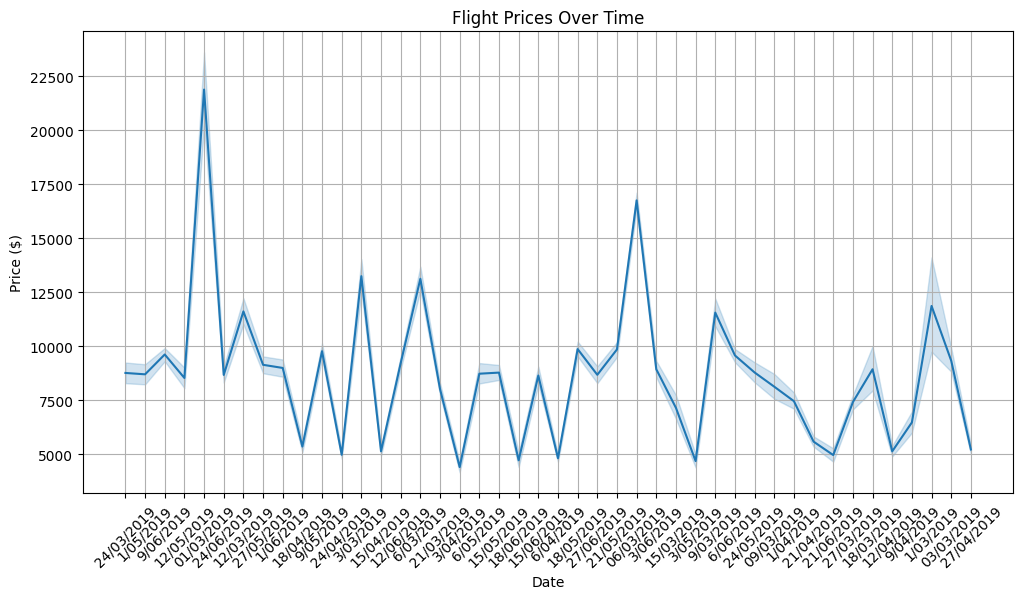

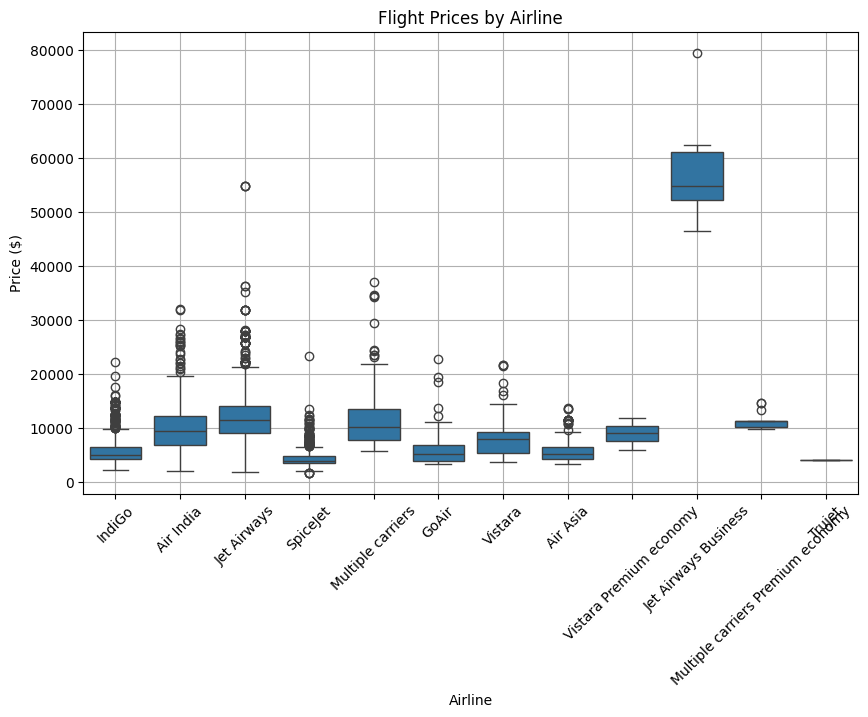

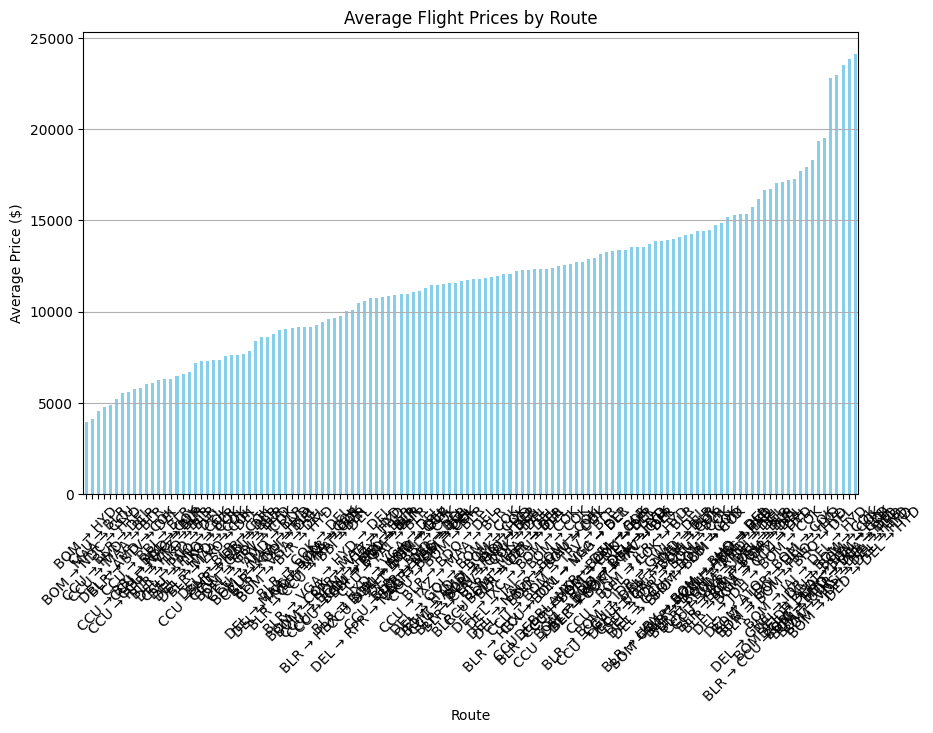

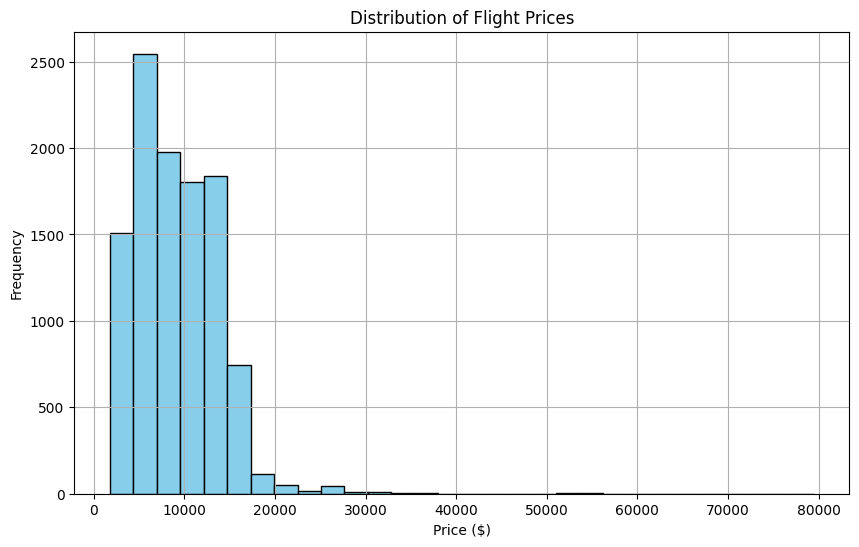

In [19]:
#ANs 7:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Analyze trends in flight prices

# Time Series Line Plot: Flight prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_of_Journey', y='Price', data=df)
plt.title('Flight Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Boxplot: Flight prices by airline
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar Chart: Average flight prices by route
plt.figure(figsize=(10, 6))
avg_price_by_route = df.groupby('Route')['Price'].mean().sort_values()
avg_price_by_route.plot(kind='bar', color='skyblue')
plt.title('Average Flight Prices by Route')
plt.xlabel('Route')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Histogram: Distribution of flight prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


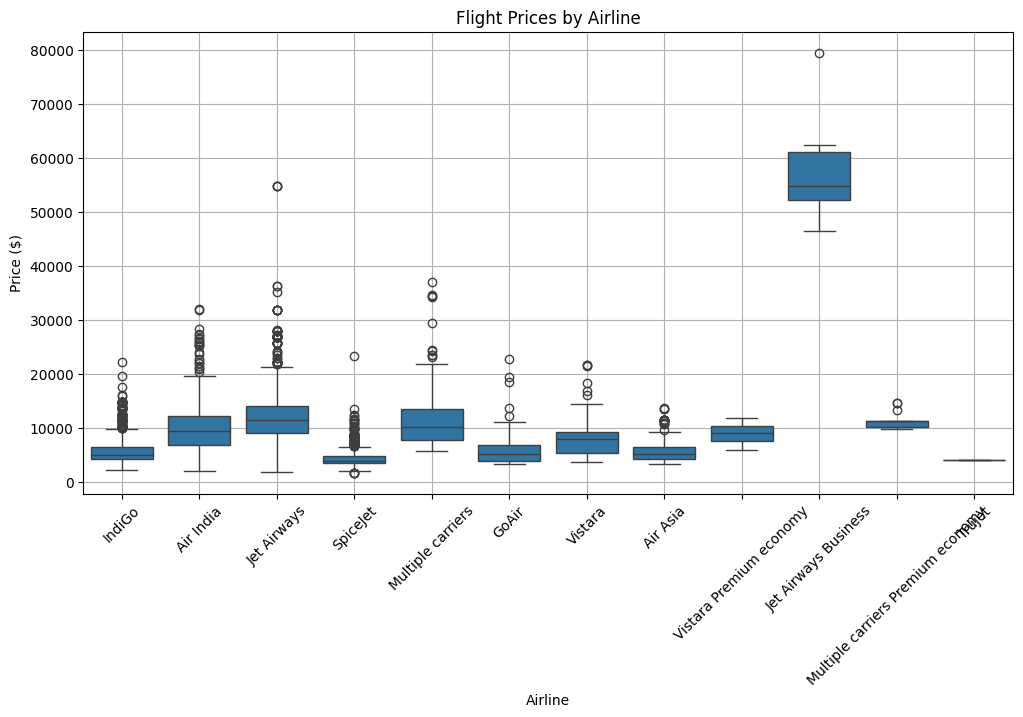

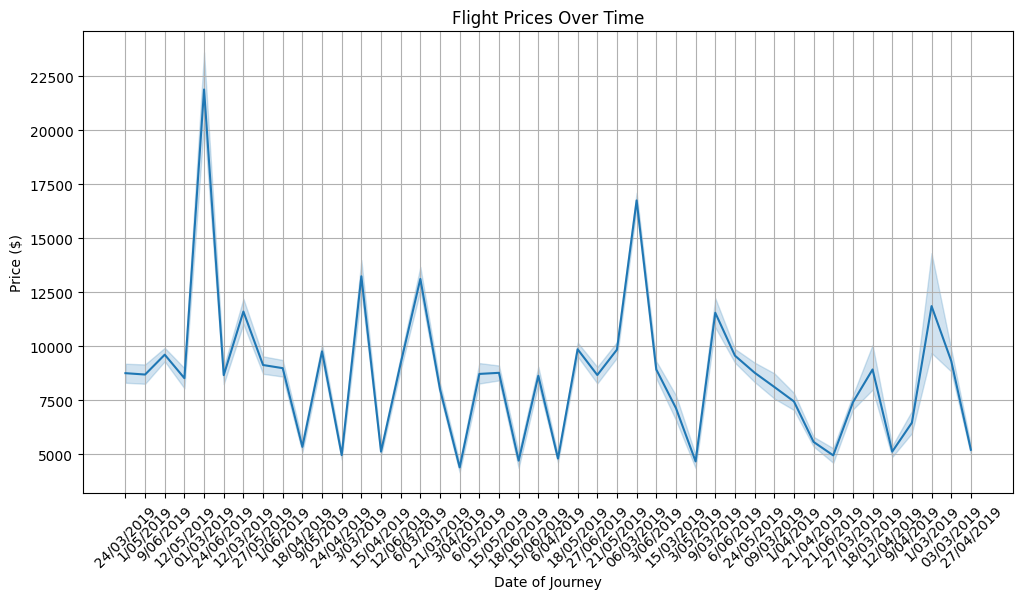

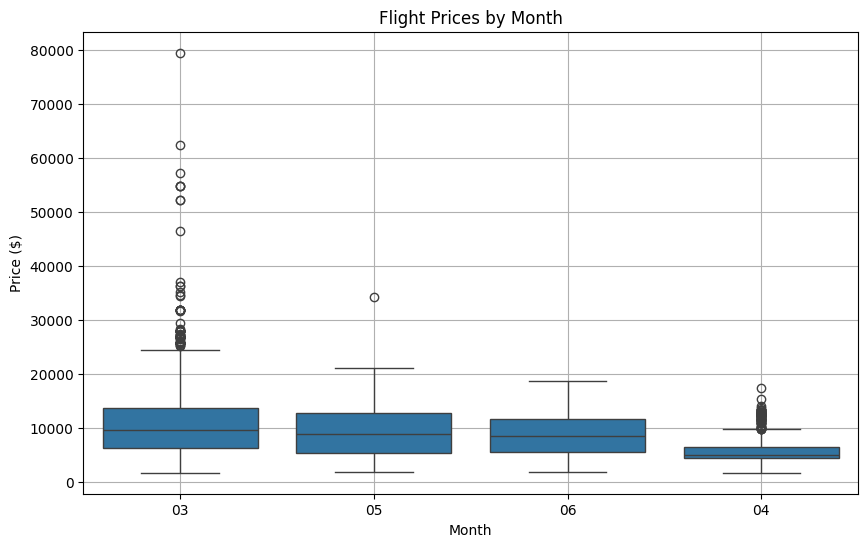

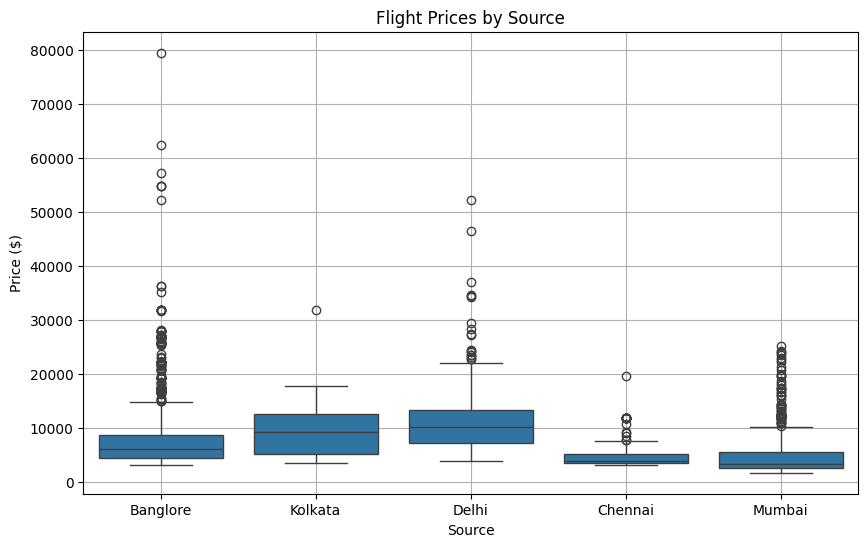

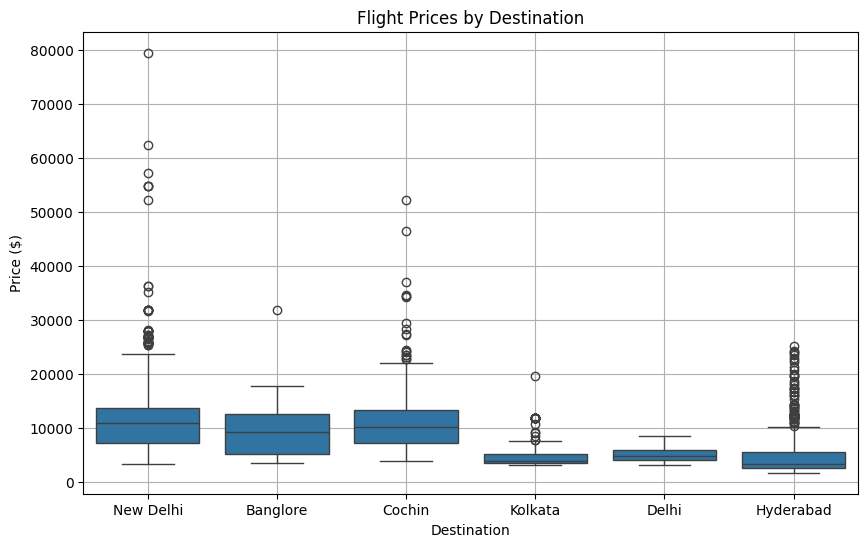

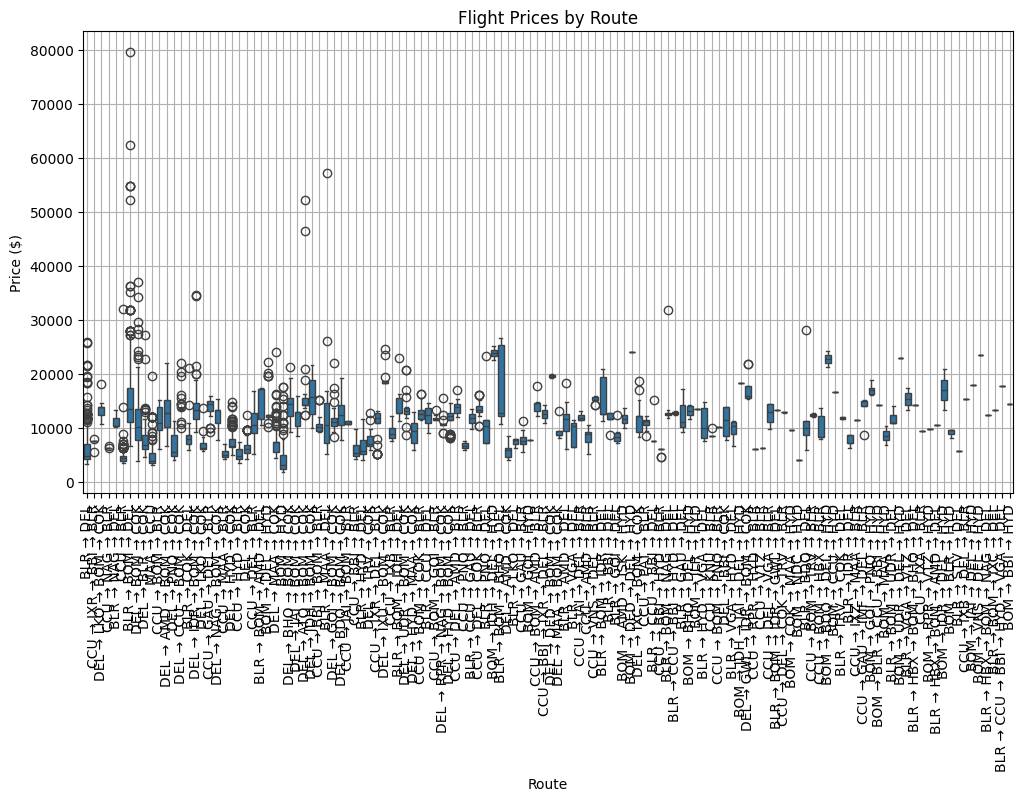

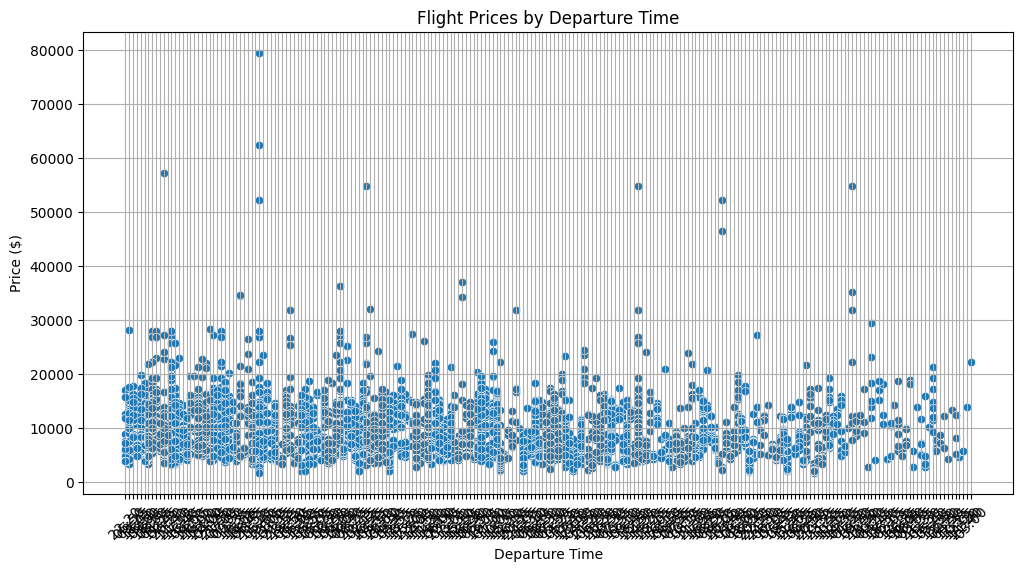

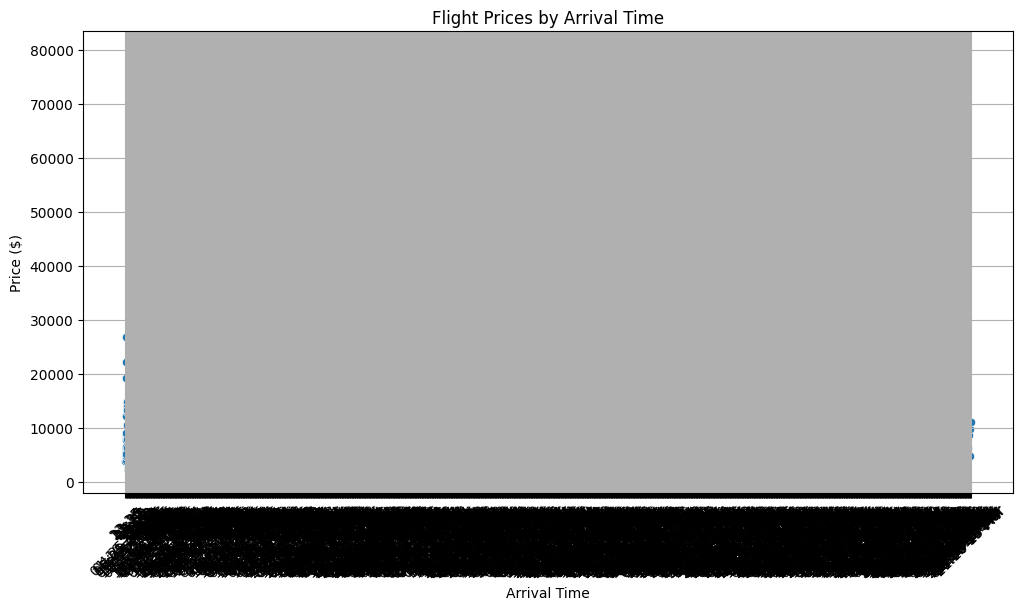

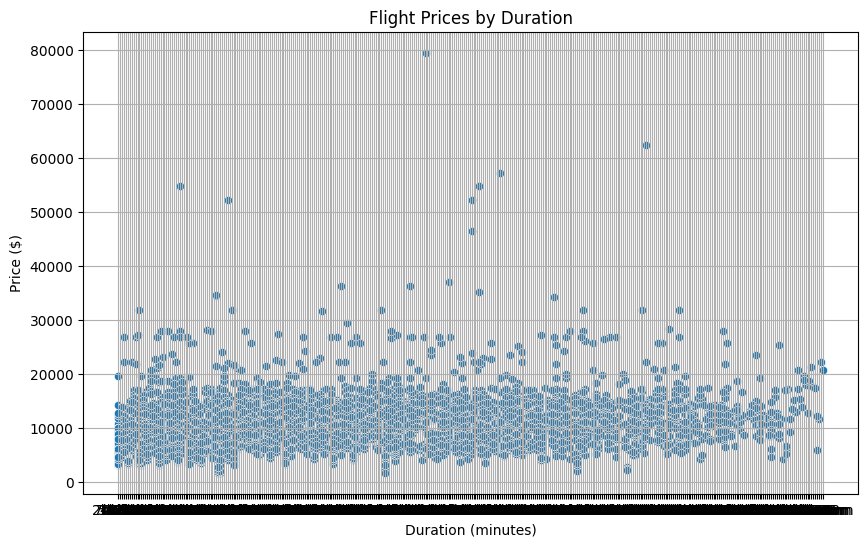

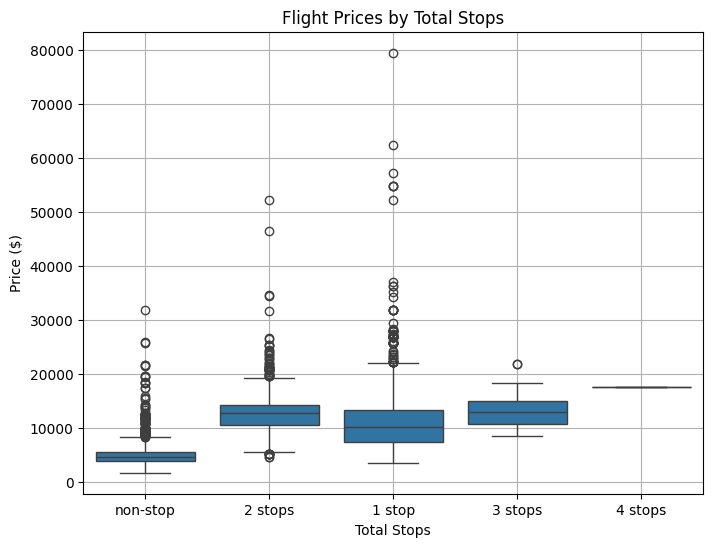

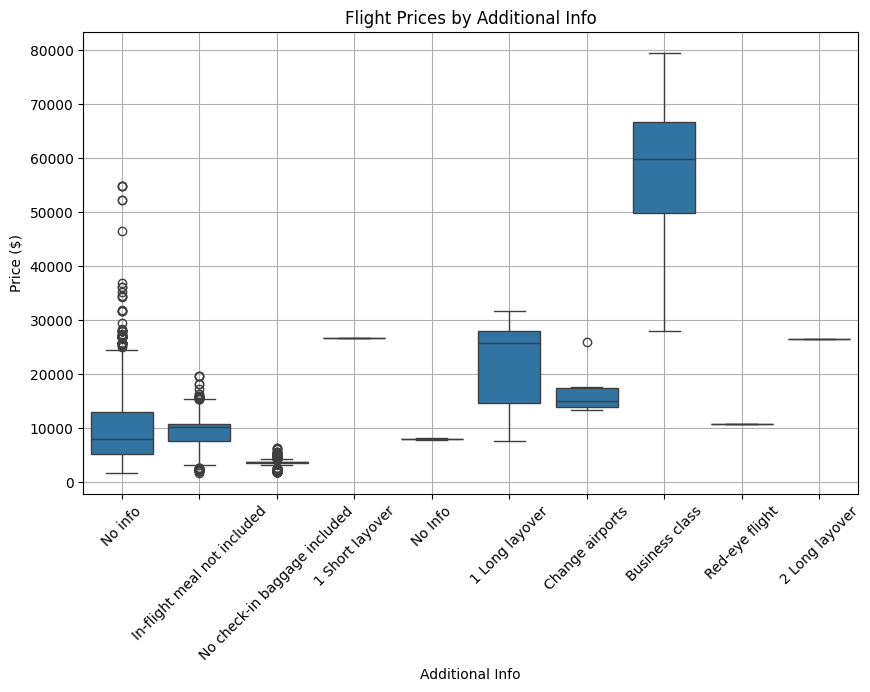

In [24]:
#Ans 8:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Airline vs. Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Date of Journey vs. Price
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_of_Journey', y='Price', data=df)
plt.title('Flight Prices Over Time')
plt.xlabel('Date of Journey')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Month vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Price', data=df)
plt.title('Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Source vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Flight Prices by Source')
plt.xlabel('Source')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Destination vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title('Flight Prices by Destination')
plt.xlabel('Destination')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Route vs. Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Route', y='Price', data=df)
plt.title('Flight Prices by Route')
plt.xlabel('Route')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Departure Time vs. Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Dep_Time', y='Price', data=df)
plt.title('Flight Prices by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Arrival Time vs. Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Arrival_Time', y='Price', data=df)
plt.title('Flight Prices by Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Duration vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title('Flight Prices by Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Total Stops vs. Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Prices by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Additional Info vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Additional_Info', y='Price', data=df)
plt.title('Flight Prices by Additional Info')
plt.xlabel('Additional Info')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [174]:
#Ans 9:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
df1=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df1.head()

num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 9367
Number of columns: 13


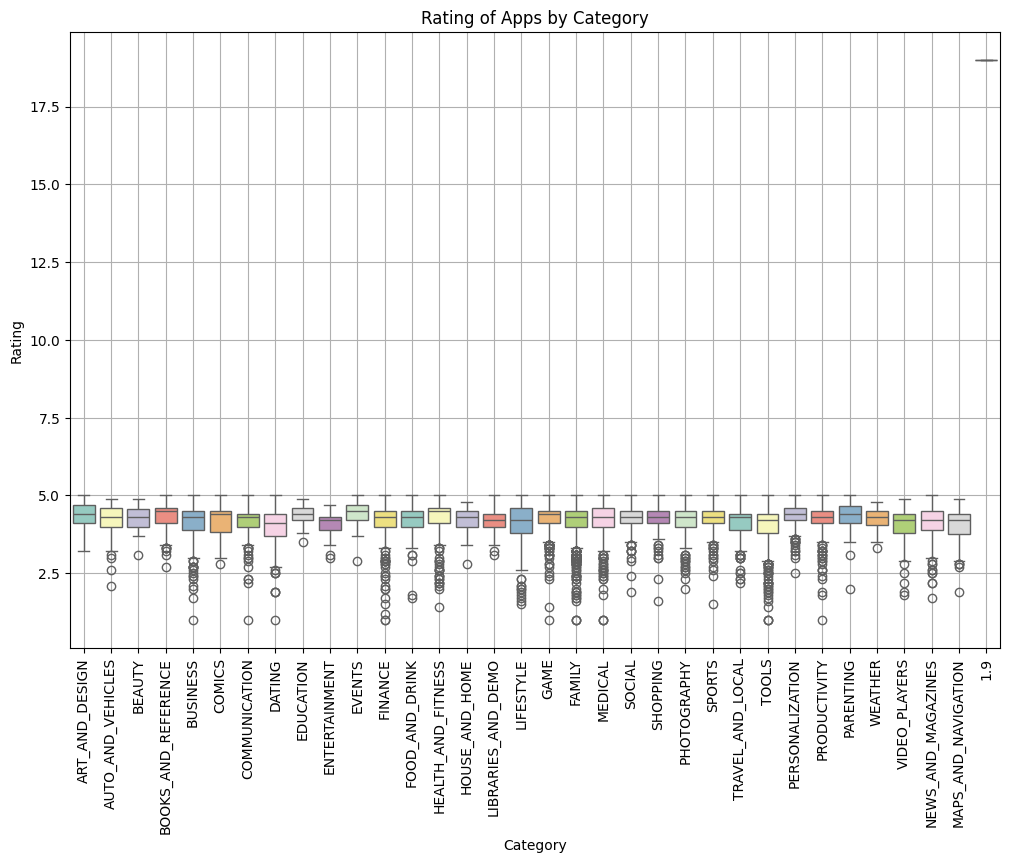

In [175]:
#ANs 10:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows with missing values in the 'Rating' and 'Category' columns
df1.dropna(subset=['Rating', 'Category'], inplace=True)

# Create a boxplot to compare ratings by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df, palette='Set3')
plt.title('Rating of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [176]:
#Ans11:
df1.isnull().sum()
"Yes there is Very Very Few Numbers of Null Value which I Will neglect while Analysis As it is very few in compare to the dataset."
df1.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


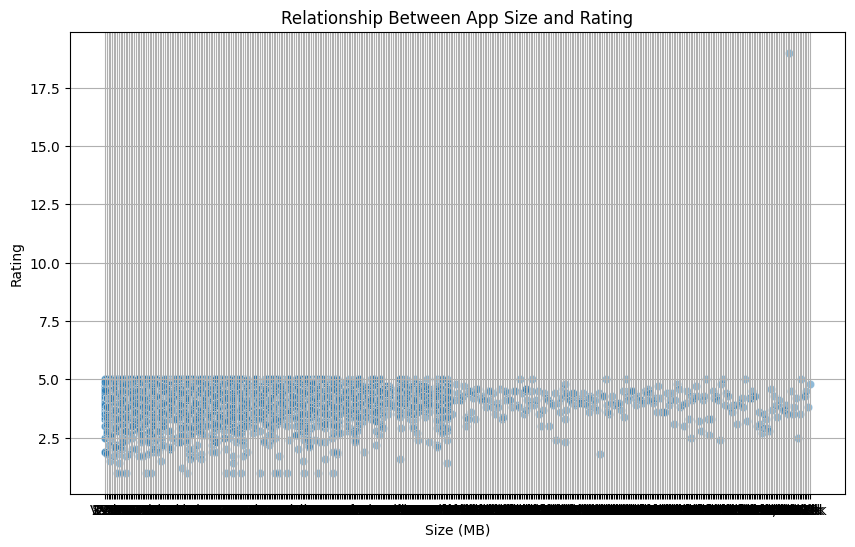

In [177]:
#ANs 12:

df_copy=df.copy()
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
# Convert 'Size' column to numeric (removing 'M' and 'k' suffixes)
df_copy['Size'] = df_copy['Size'].str.replace('M', '000').str.replace('k', '').str.replace('+', '').str.replace(',', '').astype(float)

# Create a scatter plot to visualize the relationship between app size and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df, alpha=0.5)
plt.title('Relationship Between App Size and Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


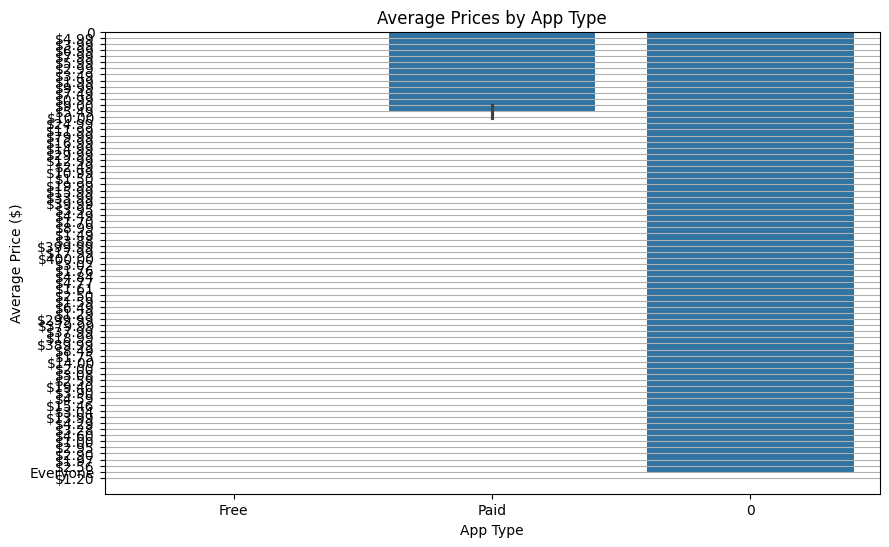

In [178]:
#Ans 13:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows with missing values in the 'Type' and 'Price' columns
df_copy.dropna(subset=['Type', 'Price'], inplace=True)
df_copy['Price']=df_copy['Price'].replace('Everyone',np.nan)
# Remove any non-numeric characters from the 'Price' column and convert it to numeric
df_copy['Price'] = df_copy['Price'].str.replace('$', '')
df_copy.dropna()
df_copy['Price'] = df_copy['Price'].astype(float)
# Create a bar chart to compare average prices by app type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.grid(axis='y')
plt.show()


In [182]:
#ANs 14:
df_copy.dropna()
df_copy['Installs'].value_counts()

Installs
1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Free                 1
Name: count, dtype: int64

In [183]:
#Ans 14:
# Assuming 'Installs' column contains numeric values
# If not, convert it to numeric by removing non-numeric characters
df_copy['Installs']=df_copy['Installs'].replace('<NA>', '0')
df_copy['Installs']=df_copy['Installs'].astype(str)
df_copy['Installs'] = df_copy['Installs'].str.replace('+', '').str.replace(',', '').str.replace('Free', '0')
df_copy['Installs'].value_counts()


Installs
1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
0                1
Name: count, dtype: int64

In [184]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
# Create a frequency table of app names and their corresponding number of installs
app_installs_freq = df_copy.groupby('App')['Installs'].sum().reset_index()

# Sort the frequency table by number of installs in descending order
top_10_apps = app_installs_freq.sort_values(by='Installs', ascending=False).head(10)

print("Top 10 Most Popular Apps by Number of Installs:")
print(top_10_apps)

Top 10 Most Popular Apps by Number of Installs:
                                App    Installs
6808                 Subway Surfers  6000000000
4003                    Google News  4000000000
4422                      Instagram  4000000000
4007                  Google Photos  4000000000
3994                   Google Drive  4000000000
4162                       Hangouts  4000000000
1894               Candy Crush Saga  3500000000
6593  Skype - free IM & video calls  3000000000
3991   Google Chrome: Fast & Secure  3000000000
7020                   Temple Run 2  3000000000


<Axes: ylabel='count'>

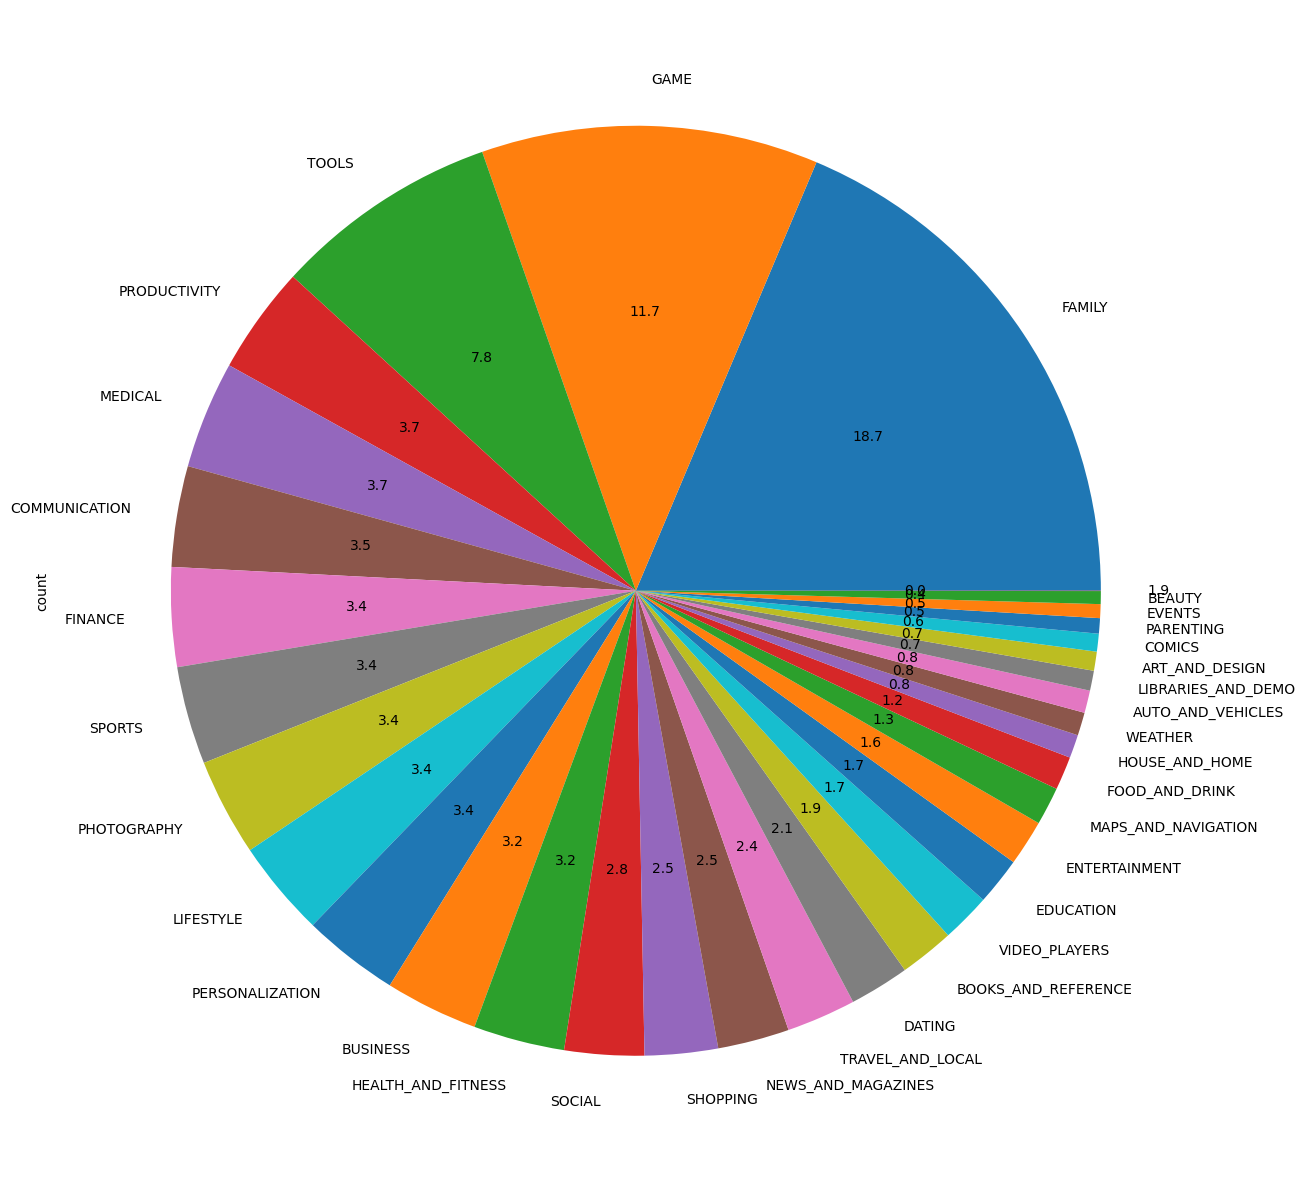

In [81]:
#ANS 15:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

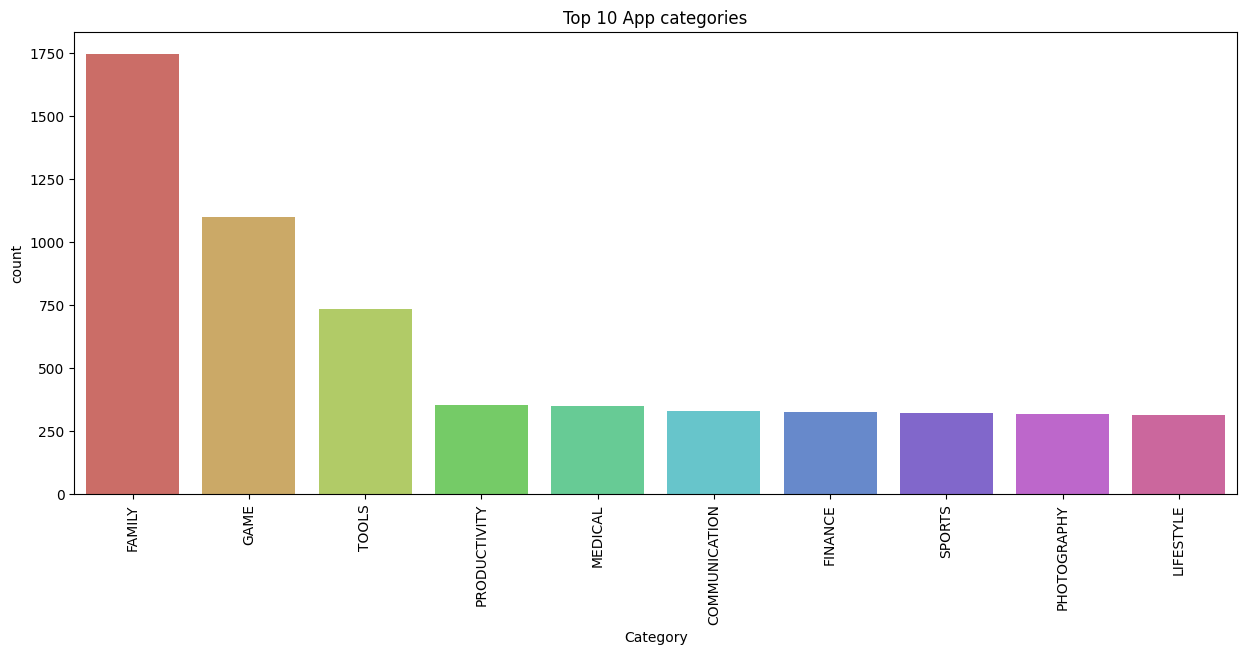

In [118]:
#ANs 15:
## Top 10 App Categories
df3 = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
df3.rename(columns = {'df3':'Count'},inplace=True)
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

